In [ ]:
!pip install ultralytics

In [2]:
import os
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
#@title download model
!gdown 18w0S7HyAp-2dpn9E613oKYQ_Z00jfsiW

Downloading...
From: https://drive.google.com/uc?id=18w0S7HyAp-2dpn9E613oKYQ_Z00jfsiW
To: /content/yolo11cls_manta_640_grayscale.pt
100% 3.19M/3.19M [00:00<00:00, 188MB/s]


In [ ]:
#@ download test images
!gdown 12KGoBpUc0DpfJUbHRDBWWXT0dfmEhEyb
!unzip mantatrust_test.zip

In [5]:
def preprocess_640_gray(img):
  target_width=640
  scale=target_width/img.shape[1]
  target_height=int(scale*img.shape[0])
  img=cv2.resize(img,(target_width,target_height))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

In [6]:
from ultralytics import YOLO
model = YOLO("/content/yolo11cls_manta_640_grayscale.pt")
classes=['manta','non manta']

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:

scores=[]
gt=[]
filenames_test=[]

folder='mantatrust_test/manta'
files=sorted(os.listdir(folder))
ct=0
for f in files:
    if ct%100==0:
      print(ct,len(files))
    filename_fullpath=folder+'/'+f
    img=cv2.imread(filename_fullpath)
    img=preprocess_640_gray(img)
    results = model(img,verbose=False,augment=False)

    score= round(float(results[0].probs.data[0]),3)
    scores.append(score)
    gt.append(1)
    filenames_test.append(f)
    ct+=1

folder='mantatrust_test/non_manta'
files=sorted(os.listdir(folder))
ct=0
for f in files:
    if ct%100==0:
      print(ct,len(files))
    filename_fullpath=folder+'/'+f
    img=cv2.imread(filename_fullpath)
    img=preprocess_640_gray(img)
    results = model(img,verbose=False,augment=False)
    score=round(float(results[0].probs.data[0]),3)
    scores.append(score)
    gt.append(0)
    filenames_test.append(f)
    ct+=1

0 198
100 198
0 3235
100 3235
200 3235
300 3235
400 3235
500 3235
600 3235
700 3235
800 3235
900 3235
1000 3235
1100 3235
1200 3235
1300 3235
1400 3235
1500 3235
1600 3235
1700 3235
1800 3235
1900 3235
2000 3235
2100 3235
2200 3235
2300 3235
2400 3235
2500 3235
2600 3235
2700 3235
2800 3235
2900 3235
3000 3235
3100 3235
3200 3235


In [8]:
dict = {'filename': filenames_test, 'confidence score': scores, 'true class':gt }
df = pd.DataFrame(dict)
df.to_csv('yolo11cls_manta_640_grayscale.csv')

AUC - ROC Score: 0.87
Accuracy: 0.91
TRUE NEGATIVE 2992
FALSE POSITIVES 243
FALSE NEGATIVE 50
TRUE POSITIVES 148


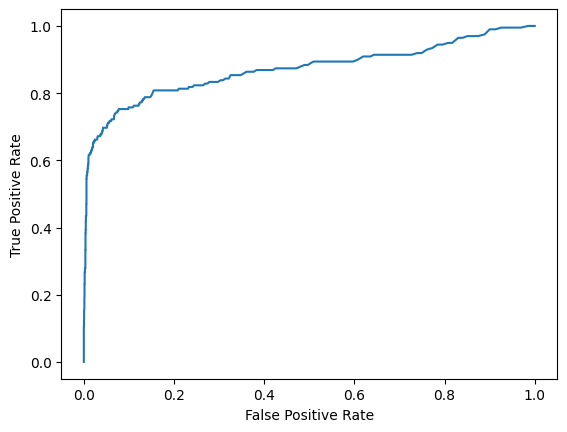

In [9]:
conf=df['confidence score'].to_numpy()
gt=df['true class'].to_numpy()
roc_auc = roc_auc_score(df['true class'],df['confidence score'])
th=0.2
pred=np.zeros_like(gt)
pred[conf>th]=1


y_test=gt
y_probs=conf
y_pred=pred

roc_auc = roc_auc_score(y_test, y_probs)
# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

CM=confusion_matrix(y_test, y_pred)
TN=CM[0,0]
FP=CM[0,1]
FN=CM[1,0]
TP=CM[1,1]

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print('TRUE NEGATIVE',TN)
print('FALSE POSITIVES',FP)
print('FALSE NEGATIVE',FN)
print('TRUE POSITIVES',TP)